In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

X.shape

(569, 30)

In [4]:
np.unique(y)

array([0, 1])

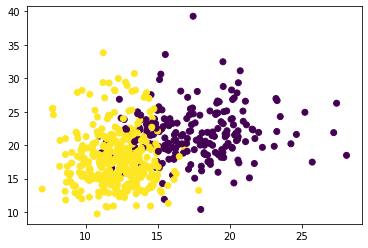

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)
Kernel = ["linear", "poly", "rbf", "sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel,
              gamma="auto", 
              degree = 1,
              cache_size=10000,  # 使用计算的内存，单位是MB，默认是200MB
              ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" %
          (kernel, clf.score(Xtest, Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.929825
0.25701403617858887
The accuracy under kernel poly is 0.923977
0.031556129455566406
The accuracy under kernel rbf is 0.596491
0.010892868041992188
The accuracy under kernel sigmoid is 0.596491
0.005421161651611328


In [7]:
Kernel = ["linear", "rbf", "sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel,
              gamma="auto", 
#               degree = 1,
              cache_size=10000,  # 使用计算的内存，单位是MB，默认是200MB
              ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" %
          (kernel, clf.score(Xtest, Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.929825
0.26088595390319824
The accuracy under kernel rbf is 0.596491
0.010689973831176758
The accuracy under kernel sigmoid is 0.596491
0.005466938018798828


In [8]:
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T  # 描述性统计
# 从mean列和std列可以看出严重的量纲不统一
# 从1%的数据和最小值相对比，90%的数据和最大值相对比，查看是否是正态分布或偏态分布，如果差的太多就是偏态分布，谁大方向就偏向谁
# 可以发现数据大的特征存在偏态问题
# 这个时候就需要对数据进行标准化

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)  # 将数据转化为0,1正态分布
data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T  # 均值很接近，方差为1了

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)
Kernel = ["linear", "poly", "rbf", "sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel,
              gamma="auto",
              degree=1,
              cache_size=10000,  # 使用计算的内存，单位是MB，默认是200MB
              ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" %
          (kernel, clf.score(Xtest, Ytest)))
    print(time()-time0)

The accuracy under kernel linear is 0.976608
0.0024619102478027344
The accuracy under kernel poly is 0.964912
0.0022840499877929688
The accuracy under kernel rbf is 0.970760
0.00341796875
The accuracy under kernel sigmoid is 0.953216
0.003016948699951172


0.9766081871345029 0.012067926406393264


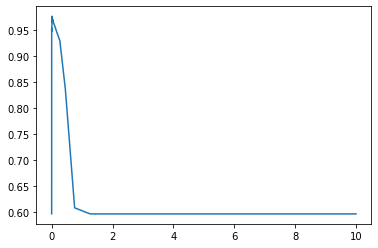

In [11]:
score = []
gamma_range = np.logspace(-10, 1, 50)  # 返回在对数刻度上均匀间隔的数字
for i in gamma_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))

print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit  # 用于支持带交叉验证的网格搜索
from sklearn.model_selection import GridSearchCV  # 带交叉验证的网格搜索

time0 = time()

gamma_range = np.logspace(-10, 1, 20)
coef0_range = np.linspace(0, 5, 10)

param_grid = dict(gamma=gamma_range, coef0=coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420)
grid = GridSearchCV(SVC(kernel='poly', degree=1,
                        cache_size=5000), param_grid=param_grid, cv=cv)

grid.fit(X, y)
print("The best parameters are %s with a score of %0.5f" %
      (grid.best_params_, grid.best_score_))
print(time()-time0)

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
4.633907079696655


### 硬间隔与软间隔：重要参数C

0.9766081871345029 1.2340816326530613


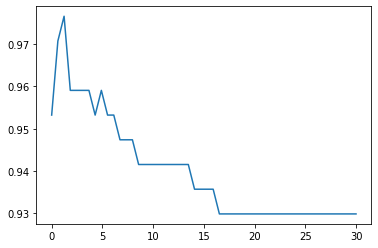

0.9824561403508771 6.7424489795918365


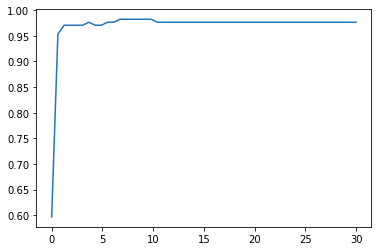

In [13]:
# 调线性核函数
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="linear", C=i, cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

# 换rbf
score = []
C_range = np.linspace(0.01, 30, 50)
for i in C_range:
    clf = SVC(kernel="rbf", C=i, gamma=0.012067926406393264,
              cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()

0.9824561403508771 6.224489795918367


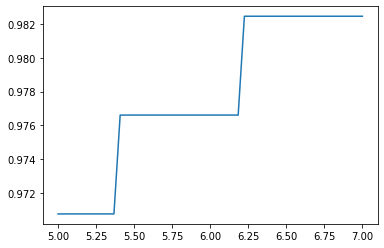

In [14]:
# 进一步细化
score = []
C_range = np.linspace(5, 7, 50)
for i in C_range:
    clf = SVC(kernel="rbf", C=i, gamma=0.012067926406393264,
              cache_size=5000).fit(Xtrain, Ytrain)
    score.append(clf.score(Xtest, Ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range, score)
plt.show()